# Assignment 3

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [822]:
import pandas as pd
import numpy as np
import os
import os.path
import glob

path = "/Users/Stephanie/Desktop/STA141/Assignments/assignment3_data/fruit/"
fnames = glob.glob(os.path.join(path, "*.xlsx"))

In [823]:
from os.path import basename

fruit = os.listdir(path)

#get the list of fruit names from path folder
fruitname = [os.path.basename(c).split('.')[0:1][0] for c in fnames]

In [847]:
foodname = []
mylist = []
x = []

#loop through the fruit folder and extract the rows that contains "fresh"
for f in range(1,len(fruitname)+1):
    df = pd.read_excel(path + fruit[f-1], header = 1)
    #drop the one that has Nan
    df = df.dropna(subset=['Form'])
    df = pd.DataFrame(df[df.iloc[:,0].str.startswith("Fresh")])
    
    TF = df[df.iloc[:,0].str.startswith("Fresh")].empty
    
    if (TF == False):
        x = fruitname[f-1]
        foodname.append(x)
        
    mylist.append(df)

newdf = pd.concat(mylist, axis = 0, ignore_index = True)
newdf = newdf.drop(newdf.columns[[5,6,7,8]], axis=1)
newdf['Type'] = "Fruit"

foodname = pd.DataFrame(foodname)
newdf['Food'] = foodname.values

#rename
newdf = newdf.rename(columns={'Average price': 'Price per cup', 'Average retail price ': 'Price per lb','Preparation':'Yield', 'Size of a ': 'lb per cup'})
newdf

,Price per cup,Price per lb,Form,Yield,lb per cup,Type,Food
0,0.422373,1.56752,Fresh1,0.9,0.242508,Fruit,apples
1,1.1891,3.04007,Fresh1,0.93,0.363763,Fruit,apricots
2,0.292965,0.566983,Fresh1,0.64,0.330693,Fruit,bananas
3,1.92292,5.77471,Fresh1,0.96,0.31967,Fruit,blackberries
4,1.59318,4.73462,Fresh1,0.95,0.31967,Fruit,blueberries
5,0.3938,0.535874,Fresh1,0.51,0.374786,Fruit,cantaloupe
6,1.33455,3.59299,Fresh1,0.92,0.341717,Fruit,cherries
7,0.848278,0.897802,Fresh1,0.49,0.462971,Fruit,grapefruit
8,0.721266,2.09383,Fresh1,0.96,0.330693,Fruit,grapes
9,0.649077,0.796656,Fresh1,0.46,0.374786,Fruit,honeydew


__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

In [1004]:
#do the same thing as #1

path2 = "/Users/Stephanie/Desktop/STA141/Assignments/assignment3_data/vegetables/"
fnames2 = glob.glob(os.path.join(path2, "*.xlsx"))

veg = os.listdir(path2)
vegname = [os.path.basename(c).split('.')[0:1][0] for c in fnames2]

foodname2 = []
mylist2 = []
x = []

for f in range(1,len(vegname)+1):
    df = pd.read_excel(path2 + veg[f-1], header = 1)
    df = df.dropna(subset=['Form'])
    df = pd.DataFrame(df[df.iloc[:,0].str.startswith("Fresh")])
    
    #get the vegetables name; 
    TF = df[df.iloc[:,0].str.startswith("Fresh")].empty
    if (TF == False):
        x = vegname[f-1]
        foodname2.append(x)
        
    mylist2.append(df)

newdf2 = pd.concat(mylist2, axis = 0)
newdf2 = newdf2.drop(newdf2.columns[[5,6,7,8]], axis=1)
newdf2 = newdf2.dropna(how = 'any')

#col_witho_form = [0,1,3,4]
#temp = newdf2[col_witho_form].replace("|'\s+", np.nan, regex=True)
#col_with_form = [2]
#vegdf = pd.concat([temp, newdf2[col_with_form]], axis=1, ignore_index = True)
#vegdf = vegdf.dropna(how = 'any')
#vegdf = pd.concat(newdf2, axis = 0, ignore_index = True)

foodname2 = pd.DataFrame(foodname2)
newdf2 = newdf2.rename(columns={'Average price': 'Price per cup', 'Average retail price ': 'Price per lb','Preparation':'Yield', 'Size of a ': 'lb per cup'})
newdf2['Type'] = "Vegetable"
newdf2

,Price per cup,Price per lb,Form,Yield,lb per cup,Type
1,1.15536,1.17225,Fresh1,0.458554,0.451948,Vegetable
1,2.27497,2.21305,Fresh1,0.375309,0.385809,Vegetable
1,2.58227,3.21349,Fresh1,0.493835,0.396832,Vegetable
1,0.964886,2.23587,Fresh1,0.740753,0.31967,Vegetable
1,0.890898,2.76355,Fresh1,1.06,0.341717,Vegetable
1,0.787893,1.24474,Fresh1,0.714,0.451948,Vegetable
1,0.245944,0.579208,Fresh green cabbage1,0.778797,0.330693,Vegetable
2,0.448412,1.05645,Fresh red cabbage1,0.779107,0.330693,Vegetable
1,0.650001,2.63084,Fresh1,1.16,0.286601,Vegetable
1,1.8125,2.69062,Fresh1,0.54,0.363763,Vegetable


__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [892]:
#combine 2 dataframe
bigdata = pd.concat([newdf, newdf2], ignore_index = True)
bigdata

,Food,Form,Price per cup,Price per lb,Type,Yield,lb per cup
0,apples,Fresh1,0.422373,1.56752,Fruit,0.9,0.242508
1,apricots,Fresh1,1.1891,3.04007,Fruit,0.93,0.363763
2,bananas,Fresh1,0.292965,0.566983,Fruit,0.64,0.330693
3,blackberries,Fresh1,1.92292,5.77471,Fruit,0.96,0.31967
4,blueberries,Fresh1,1.59318,4.73462,Fruit,0.95,0.31967
5,cantaloupe,Fresh1,0.3938,0.535874,Fruit,0.51,0.374786
6,cherries,Fresh1,1.33455,3.59299,Fruit,0.92,0.341717
7,grapefruit,Fresh1,0.848278,0.897802,Fruit,0.49,0.462971
8,grapes,Fresh1,0.721266,2.09383,Fruit,0.96,0.330693
9,honeydew,Fresh1,0.649077,0.796656,Fruit,0.46,0.374786


__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

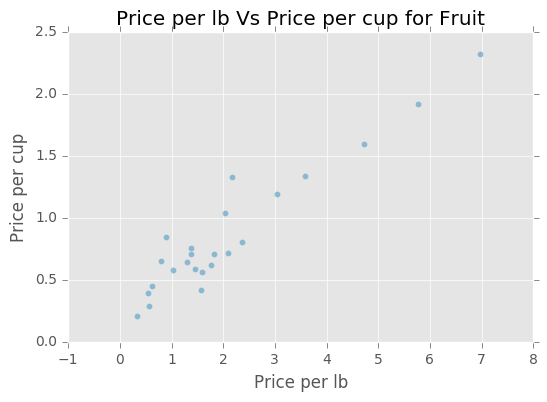

In [1001]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

newdf.plot.scatter(x='Price per lb', y='Price per cup', alpha=.5)
plt.title('Price per lb Vs Price per cup for Fruit')
plt.show()

In [929]:
"""Q1: What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?"""
#Raspberries are the most expensive per pound. The least expensive is watermelon.

'Q1: What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?'

In [984]:
"""Q2: How do the price distributions compare for fruit and vegetables?"""
print newdf['Price per lb'].mean(), newdf2['Price per lb'].mean()

# The price per lb for fruit are relatively high compared to the vegetables. 
# The mean price of the fruit per lb is 2.077 and the mean price for the vegetables is 1.839.

2.07687719077 1.83870080439


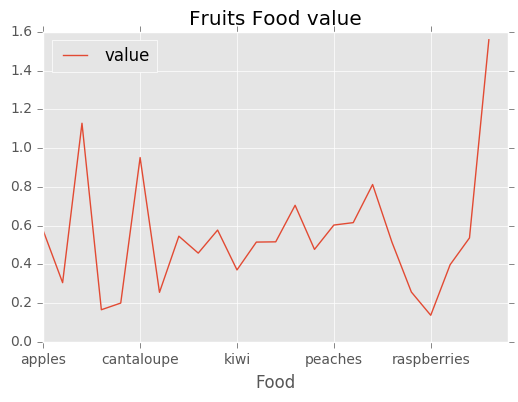

In [1002]:
"""Q3: Which foods are the best value for the price?"""
newdf['value'] = newdf['Yield']/newdf['Price per lb']
newdf

newdf.plot(x='Food', y='value', xlim= (0,24));
plt.title('Fruits Food value')
plt.show()
del newdf['value']

#for vegetables
newdf2['value'] = newdf2['Yield']/newdf2['Price per lb']
newdf2
del newdf2['value']

#Watermelon has the best value for the price out of the Fruits because it has the lowest ratio of yield over price.
#For vegetable, Asparagus has the best value.

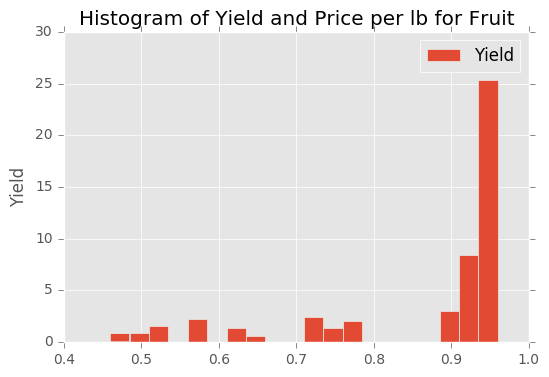

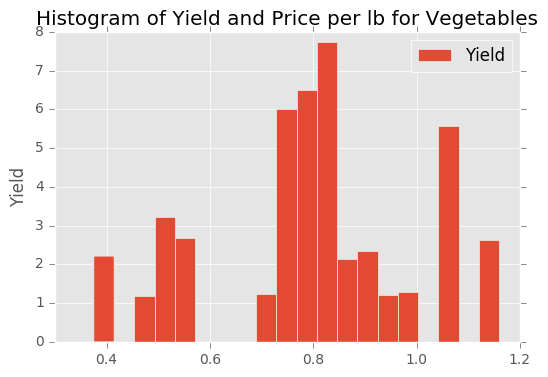

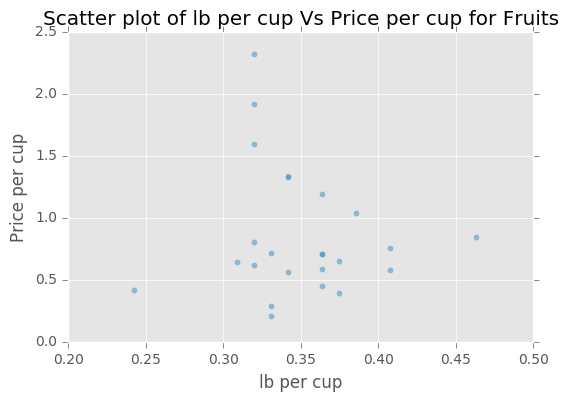

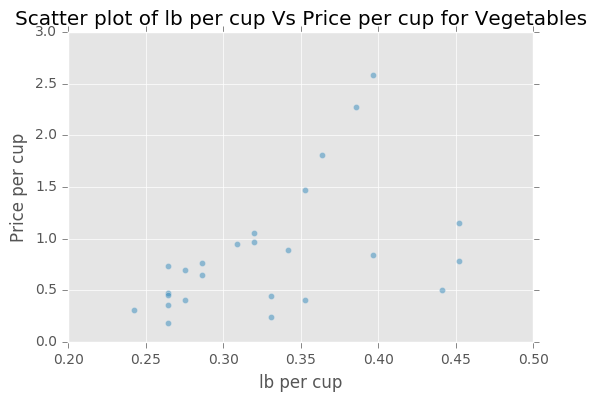

In [1003]:
"Q4: What's something surprising about this data set?"
newdf.plot(y = 'Yield',kind='hist',bins=20,weights=newdf['Price per lb'])
plt.ylabel('Yield')
plt.title('Histogram of Yield and Price per lb for Fruit')
plt.show()

newdf2.plot(y = 'Yield',kind='hist',bins=20,weights=newdf2['Price per lb'])
plt.ylabel('Yield')
plt.title('Histogram of Yield and Price per lb for Vegetables')
plt.show()

bigdata['value'] = bigdata['Price per lb']/bigdata['lb per cup']

newdf.plot.scatter(x='lb per cup', y='Price per cup', alpha=.5)
plt.title('Scatter plot of lb per cup Vs Price per cup for Fruits')
plt.show()

newdf2.plot.scatter(x='lb per cup', y='Price per cup', alpha=.5)
plt.title('Scatter plot of lb per cup Vs Price per cup for Vegetables')
plt.show()

#I found surprising that the distribution of preparation yield factor 
# for fruit tends to be higher compared to vegetables. The distribution for vegetable is more even.
# On the other hand, raspberries, blackberries, and blueberries are the top 3 fruits that 
# have the higher ratio of price per lb over lb per cup. #For vegetables, it is kale,collard green,and okra.

In [997]:
"Q5: Which foods do you expect to provide the best combination of price, yield, and nutrition?"

#I think that Asparagus would provide the best combination because as what I found, 
#it has the best value of price and yield. And I know that it is an excellent source for many kinds of Vitamin.

'Q5: Which foods do you expect to provide the best combination of price, yield, and nutrition?'